In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage as ndi
import plotly.graph_objects as go
import pandas as pd
import numpy as np

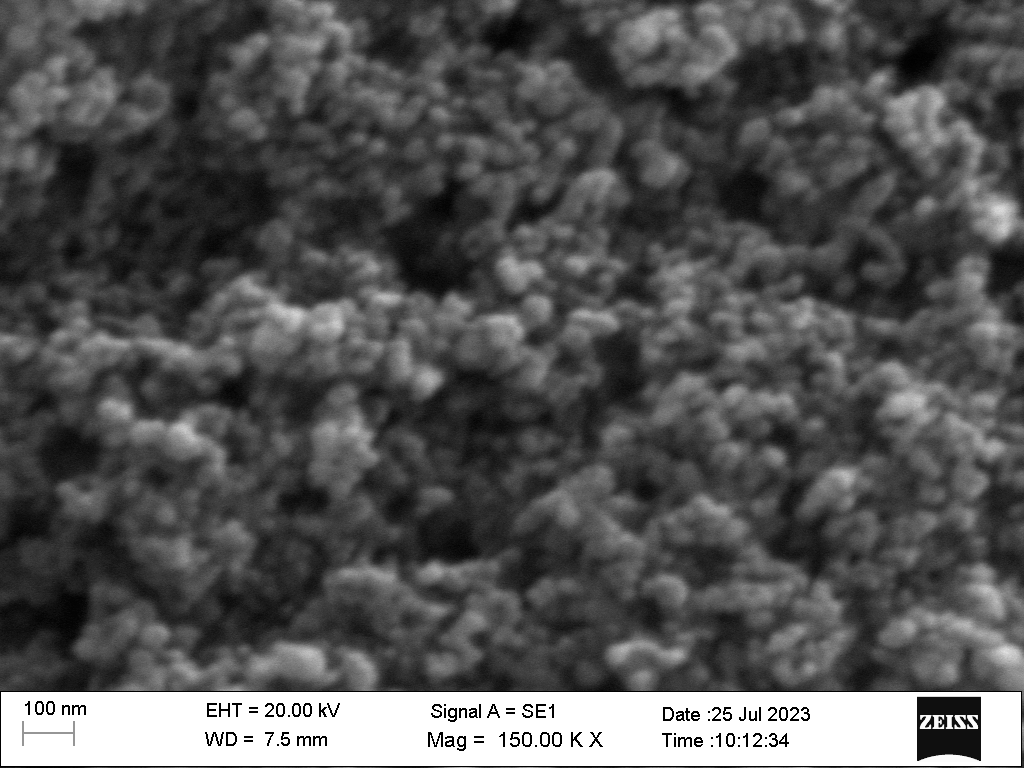

In [3]:
# Load the image using Pillow
image_path = "img/test.tif"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image

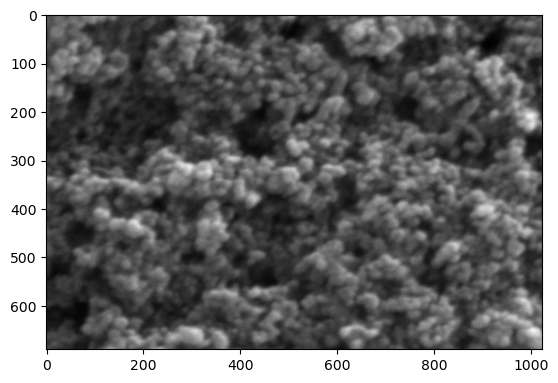

In [4]:
# Convert the image to a NumPy array
image_array = np.array(image)
image_array = image_array[:690]
plt.imshow(image_array, cmap='gray')

In [35]:
image_array.shape

(690, 1024)

In [94]:
z = image_array 
x, y = np.meshgrid(np.arange(image_array.shape[1]), np.arange(image_array.shape[0]))

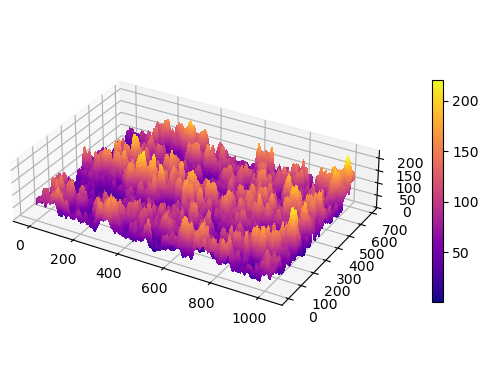

In [73]:
# Create a 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Create the 3D depth surface plot with colormap
cmap = plt.get_cmap('plasma')  # Choose your preferred colormap
surface = ax.plot_surface(x, y, z, cmap=cmap, rstride=1, cstride=1, linewidth=0, antialiased=False)

# surface = ax.plot_surface(x, y, z, cmap=cmap, antialiased=False) # Faster but color map not accurate

fig.colorbar(surface, shrink=0.6, aspect=20, pad=0.12)

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))


# Show the plot
plt.show()

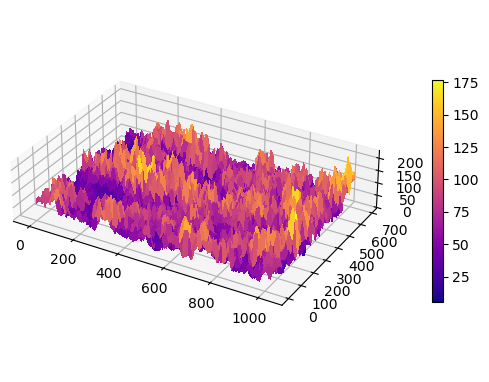

In [74]:
# Create a 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Create the 3D depth surface plot with colormap
cmap = plt.get_cmap('plasma')  # Choose your preferred colormap

surface = ax.plot_surface(x, y, z, cmap=cmap, antialiased=False) # Faster but color map not accurate

fig.colorbar(surface, shrink=0.6, aspect=20, pad=0.12)

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))


# Show the plot
plt.show()

**If you want to rescale the axis labels**

73-22 pixels = 100 nm

1 pixels $\approx$ 2nm

In [125]:
# Normalised [-1,1]
z = 2.*(z - np.min(z))/np.ptp(z)-1

# Normalised [0,1]
# z = (z - np.min(z))/np.ptp(z)

depth_difference = 200 ## If We Assume depth difference from highest to lowest as 200 nm
z = z * depth_difference

x = np.arange(image_array.shape[1]) * 2
y = np.arange(image_array.shape[0]) * 2

x, y = np.meshgrid(x, y) 

In [126]:
np.ptp(x), np.ptp(y), np.ptp(z)

(2046, 1378, 500.0)

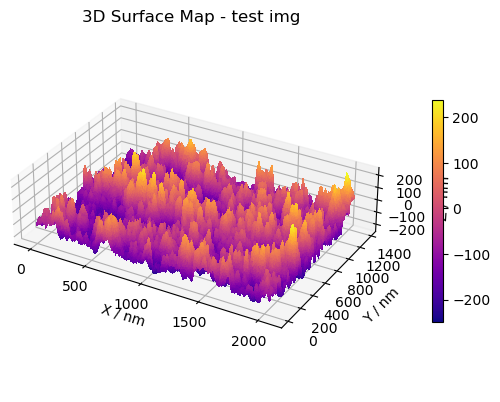

In [127]:
# Create a 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Create the 3D depth surface plot with colormap
cmap = plt.get_cmap('plasma')  # Choose your preferred colormap
surface = ax.plot_surface(x, y, z, cmap=cmap, rstride=1, cstride=1, linewidth=0, antialiased=False)

# surface = ax.plot_surface(x, y, z, cmap=cmap, antialiased=False) # Faster but color map not accurate

fig.colorbar(surface, shrink=0.6, aspect=20, pad=0.12)

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

# Set labels and title
ax.set_xlabel('X / nm')
ax.set_ylabel('Y / nm')
ax.set_zlabel('Z / nm')
ax.set_title('3D Surface Map - test img')

# Show the plot
plt.show()

In [129]:
def custom_plot(image_path, depth_difference, xy_scale):
    '''
    depth_difference : depth difference from highest to lowest in nano meters
    xy_scale :  how many nano meters does 1 pixel represent
    '''
    image = Image.open(image_path).convert('L') 
    image_array = np.array(image)
    image_array = image_array[:690]
    z = image_array 

    # Normalised [0,1]
    z = (z - np.min(z))/np.ptp(z)

    z = z * depth_difference

    x = np.arange(image_array.shape[1]) * 2
    y = np.arange(image_array.shape[0]) * 2

    x, y = np.meshgrid(x, y) 
    # Create a 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Create the 3D depth surface plot with colormap
    cmap = plt.get_cmap('plasma')  # Choose your preferred colormap
    surface = ax.plot_surface(x, y, z, cmap=cmap, rstride=1, cstride=1, linewidth=0, antialiased=False)

    # surface = ax.plot_surface(x, y, z, cmap=cmap, antialiased=False) # Faster but color map not accurate

    fig.colorbar(surface, shrink=0.6, aspect=20, pad=0.12)

    ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

    # Set labels and title
    ax.set_xlabel('X / nm')
    ax.set_ylabel('Y / nm')
    ax.set_zlabel('Z / nm')
    ax.set_title('3D Surface Map - test img')

    # Show the plot
    plt.show()

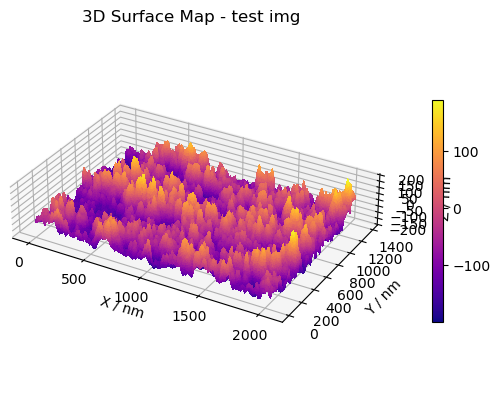

In [130]:
custom_plot('img/img01.tif')

In [ ]:
custom_plot('img/img02.tif')

In [ ]:
custom_plot('img/img03.tif')

In [ ]:
custom_plot('img/img04.tif')